L'objectif de ce NB est de vérifier la distribution de la solution du problème de moindres carrés linéaires. Plus précisément, on vérifie que la distribution des résidus est correcte pour la classe `LinearLeastSquaresCalibration`. 
On considère ici un modèle *exactement* linéaire.

## Generate the observations

In [2]:
import numpy as np
import openturns as ot

In [3]:
ot.RandomGenerator.SetSeed(0)

In [4]:
def modelLineaire(X):
    x,theta1,theta2,theta3 = X
    y = theta1 + theta2*x + theta3*x**2
    return [y]

In [5]:
g = ot.PythonFunction(4, 1, modelLineaire) 

In [6]:
descr = ["Theta1", "Theta2", "Theta3"]

In [7]:
trueParameter = ot.Point([12.,7.,-8])
trueParameter

class=Point name=Unnamed dimension=3 values=[12,7,-8]

In [8]:
parameterDimension = trueParameter.getDimension()
parameterDimension

3

In [9]:
X = ot.Uniform()
Theta1 = ot.Dirac(trueParameter[0])
Theta2 = ot.Dirac(trueParameter[1])
Theta3 = ot.Dirac(trueParameter[2])

X.setDescription(["X"])
Theta1.setDescription(["Theta1"])
Theta2.setDescription(["Theta2"])
Theta3.setDescription(["Theta3"])

inputRandomVector = ot.ComposedDistribution([X, Theta1, Theta2, Theta3])

In [10]:
candidate = ot.Point([8.,9.,-6.])
candidate

class=Point name=Unnamed dimension=3 values=[8,9,-6]

In [12]:
calibratedIndices = [1,2,3]
model = ot.ParametricFunction(g, calibratedIndices, candidate)

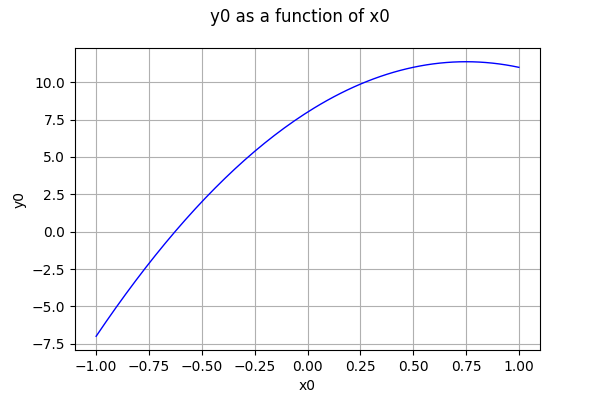

In [13]:
model.draw(-1,1)

## Calibration

In [14]:
outputObservationNoiseSigma = 2. # (Pa)
observationOutputNoise = ot.Normal(0.,outputObservationNoiseSigma)

In [15]:
size = 500
calibrationResult, inputObservations, outputObservations = generateTheta(size, observationOutputNoise, candidate)

In [ ]:
# 1. Generate exact outputs
inputSample = inputRandomVector.getSample(size)
outputStress = g(inputSample)
# 2. Add noise
sampleNoiseH = observationOutputNoise.getSample(size)
outputObservations = outputStress + sampleNoiseH
# 3. Calibrate
inputObservations = inputSample[:,0]
algo = ot.LinearLeastSquaresCalibration(model, inputObservations, outputObservations, candidate, "SVD")
algo.run()
calibrationResult = algo.getResult()

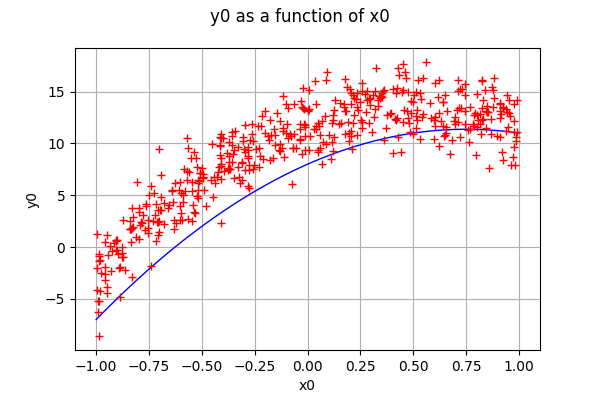

In [16]:
myGraph = model.draw(-1,1)
myCloud = ot.Cloud(inputObservations,outputObservations)
myCloud.setColor("red")
myGraph.add(myCloud)
myGraph

## Draw residual distribution

The goal is to check the distribution of the residuals.

In [20]:
residualDistribution = calibrationResult.getObservationsError()
residualDistribution

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[7.57337] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

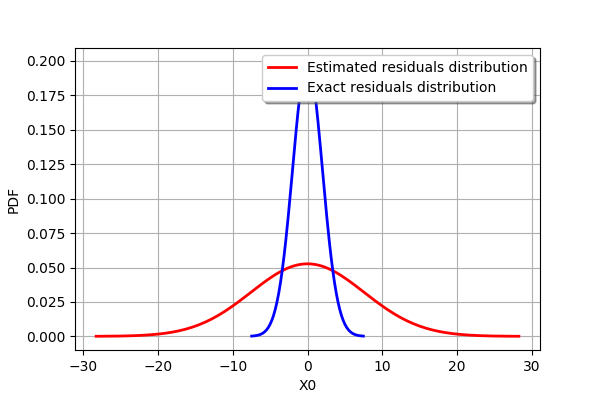

In [21]:
graph = residualDistribution.drawPDF()
graphExact = observationOutputNoise.drawPDF()
graphExact.setColors(["blue"])
graph.add(graphExact)
graph.setLegends(["Estimated residuals distribution","Exact residuals distribution"])
graph

In [22]:
model.setParameter(trueParameter)
#for i in range(size):
#    print(model.parameterGradient(inputObservations[i]).transpose())

In [23]:
model.setParameter(candidate)
#for i in range(size):
#    print(model.parameterGradient(inputObservations[i]).transpose())